In [1]:
import numpy as np
import pandas as pd

In [100]:
df = pd.read_csv('/content/placement.csv')

In [101]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [102]:
df.shape

(100, 4)

# steps

1. preprocess + EDA + feature selection
2. extract input n output cols
3. scale the values
4. train test split
5. train the model
6. evaluate the model/model selection
7. deploy the model

## loading DATASET

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [110]:
df = df.iloc[:,-3:]

## preprocessing

In [111]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


##EDA

In [112]:
import matplotlib.pyplot as plt


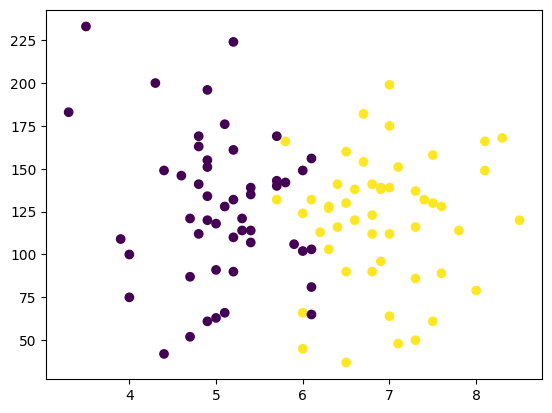

In [116]:

plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

plt.show()

##Extract input n output columns

In [121]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [122]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [123]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


##train test split

In [124]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

In [125]:
X_train

,cgpa,iq
92,5.2,110.0
24,4.7,121.0
22,4.9,120.0
46,5.3,114.0
9,5.1,66.0
...,...,...
97,6.7,182.0
23,4.7,87.0
71,6.1,132.0
69,8.5,120.0


In [126]:
X_test

,cgpa,iq
58,8.0,79.0
6,5.7,143.0
0,6.8,123.0
80,4.9,196.0
12,5.4,139.0
89,4.9,151.0
85,5.8,166.0
52,7.0,175.0
82,6.5,37.0
44,7.5,61.0


##scale the values

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()


In [129]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
X_train

array([[-7.11054635e-01, -3.07818220e-01],
       [-1.15615926e+00, -2.02597979e-02],
       [-9.78117409e-01, -4.64014726e-02],
       [-6.22033711e-01, -2.03251521e-01],
       [-8.00075560e-01, -1.45805191e+00],
       [-6.22033711e-01, -2.02597979e-02],
       [ 8.91322008e-01, -1.51033526e+00],
       [-8.79081631e-02, -4.12384919e-01],
       [ 1.11276156e-03, -1.45805191e+00],
       [ 3.57196460e-01, -1.50968172e-01],
       [ 1.33642663e+00,  2.15015275e-01],
       [ 7.13280158e-01, -2.55534870e-01],
       [ 8.91322008e-01,  4.50290347e-01],
       [ 1.15838478e+00,  3.98006998e-01],
       [-8.89096485e-01, -8.04510040e-01],
       [ 1.11276156e-03,  7.11707094e-01],
       [-5.33012786e-01, -2.03251521e-01],
       [ 9.01336862e-02,  8.94698817e-01],
       [ 9.01336862e-02, -4.90809943e-01],
       [ 4.46217385e-01,  2.15015275e-01],
       [-1.06713833e+00,  1.07769054e+00],
       [-8.89096485e-01, -9.86848221e-02],
       [ 1.42544756e+00, -8.56793389e-01],
       [-1.

In [131]:
X_test

array([[ 1.78153125, -1.11821014],
       [-0.26595001,  0.55485705],
       [ 0.71328016,  0.03202355],
       [-0.97811741,  1.94036581],
       [-0.53301279,  0.45029035],
       [-0.97811741,  0.76399044],
       [-0.17692909,  1.15611556],
       [ 0.89132201,  1.39139064],
       [ 0.44621738, -2.21616047],
       [ 1.33642663, -1.58876028],
       [-0.71105464, -0.83065171],
       [-1.51224296,  2.04493251],
       [ 0.62425923,  0.84241547],
       [ 0.44621738, -0.83065171],
       [-1.06713833, -0.25553487],
       [-0.97811741,  0.86855714],
       [-1.77930573, -1.22277684],
       [ 0.71328016,  0.5025737 ],
       [ 2.04859403,  1.20839891],
       [-0.71105464,  1.02540719]])

## training the model

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
clf = LogisticRegression()

# model training

In [134]:
clf.fit(X_train, Y_train)

LogisticRegression()

##evaluate the model

In [135]:
y_pred = clf.predict(X_test)

In [136]:
Y_test

,placement
58,1
6,0
0,1
80,0
12,0
89,0
85,1
52,1
82,1
44,1


In [137]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(Y_test, y_pred)

0.95

In [139]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

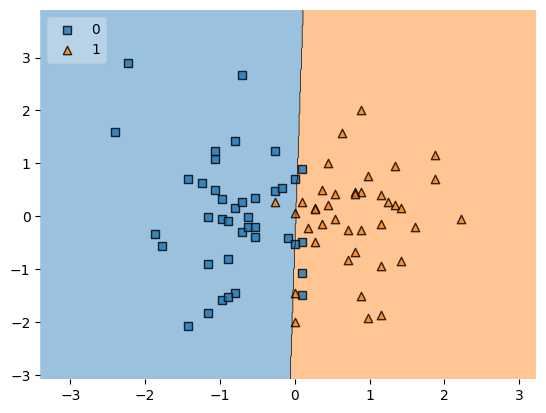

In [140]:
# Plotting decision regions
plot_decision_regions(X_train,Y_train.values, clf=clf, legend=2)

with this lib i can execute my model in website

In [144]:
import pickle

In [145]:
pickle.dump(clf, open('model.pkl', 'wb'))